In [1]:
import pathlib
import numpy as np
import pandas as pd
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'
from deepplot import Roc_Auc_Plot
from deepplot import paths_sorted, ModelResultsEvaluation, MultiModelResultsEvaluation
%matplotlib inline

In [2]:
indir = pathlib.Path('./input_data')
outdir = pathlib.Path('./output_data')

## ROC 曲线绘制

In [3]:
# Input the results files
results_path = indir.absolute()
csv_files = [x for x in paths_sorted(results_path.iterdir()) if x.suffix == '.csv']
model_results = [ModelResultsEvaluation(x) for x in csv_files]

In [4]:
# dataset distribution
print(model_results[0].get_distribution())

dataset  train  validation  test  external  All
label                                          
0          179          59    59        59  356
1          205          69    69        37  380
All        384         128   128        96  736


### Single ROC curve

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 432x288 with 0 Axes>

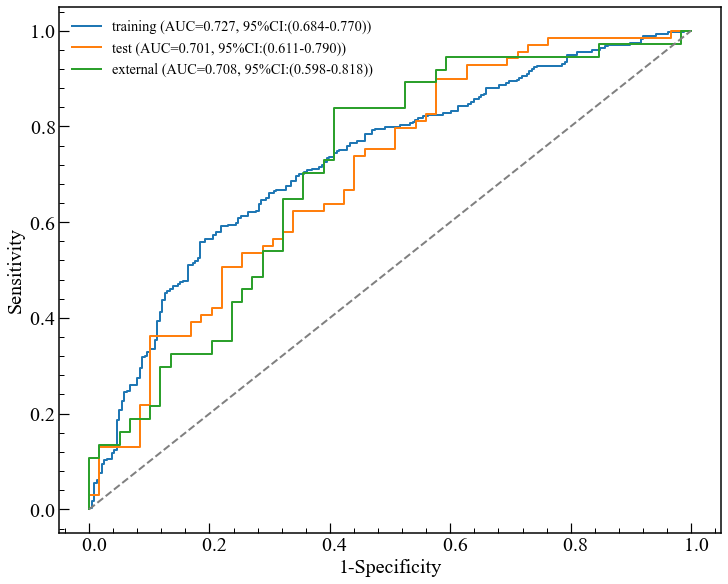

In [5]:
single_result = model_results[0]
single_result.plot_roc_auc()

<Figure size 432x288 with 0 Axes>

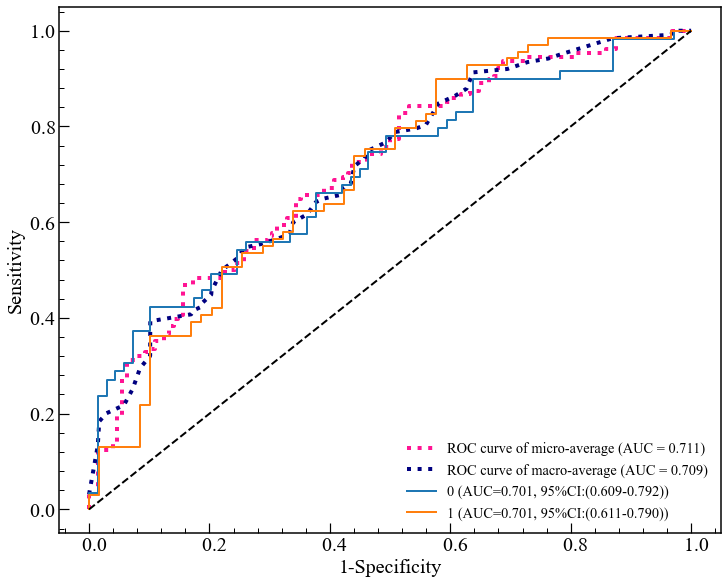

In [6]:
single_result.plot_roc_auc1()

## The multi-Roc from different files

<Figure size 432x288 with 0 Axes>

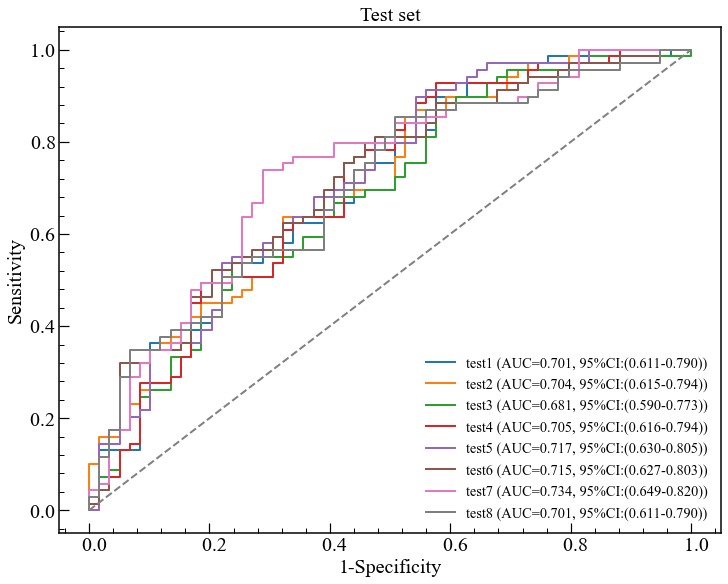

In [7]:
multi_results = MultiModelResultsEvaluation(model_results)
_ = multi_results.plot_roc_auc(dataset='test', title='Test set')

<Figure size 432x288 with 0 Axes>

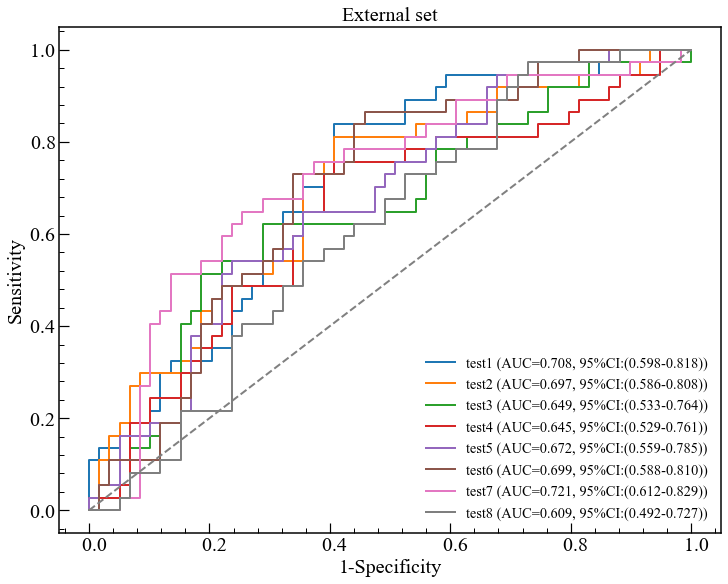

In [8]:
_ = multi_results.plot_roc_auc(dataset='external', title='External set')

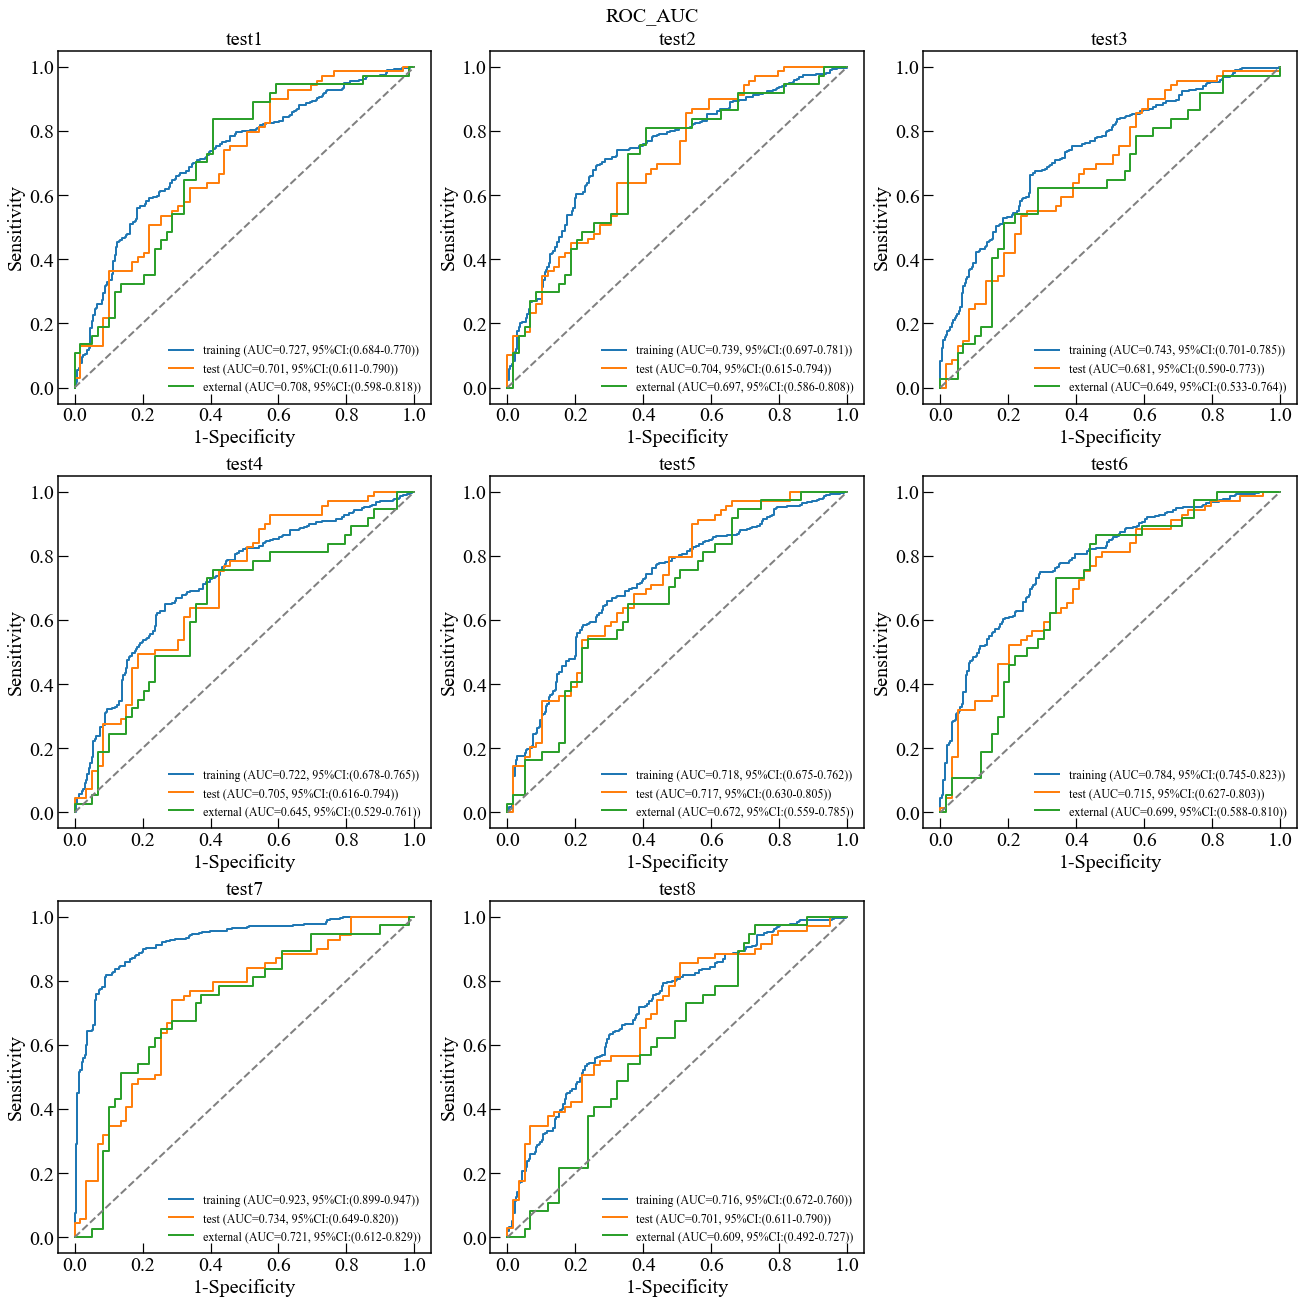

In [9]:
_ = multi_results.plot_roc_auc_multi(dataset=['train+', 'test', 'external'], savefig=outdir/'roc_auc.png', title='name')

## The confusion matrix for different dataset

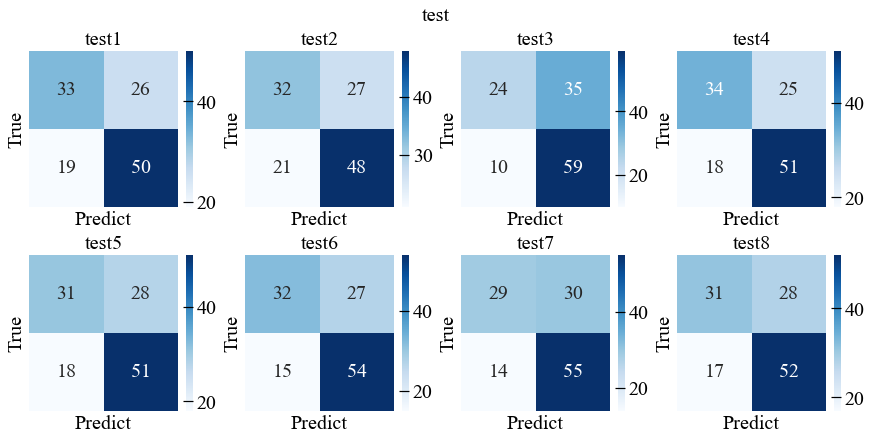

In [10]:
_ = multi_results.plot_confusion_matrix_multi(dataset='test', savefig=outdir/'cm.png', fig_titles='name')

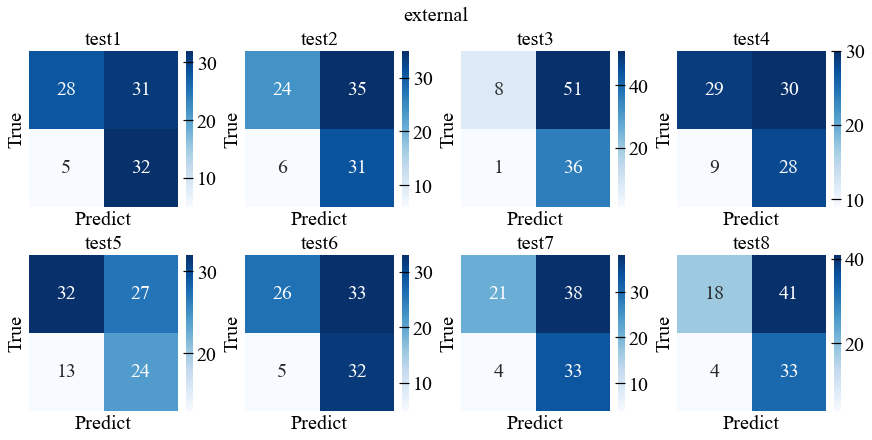

In [11]:
_ = multi_results.plot_confusion_matrix_multi(dataset='external', savefig=outdir/'CM_external.png', fig_titles='name')

## Evaluate the metrics for different dataset

In [12]:
eval_tab = multi_results.evaluation(dataset='train+')
print(eval_tab)

    data       auc  accuracy    recall  specificity        f1
0  test1  0.726860  0.669922  0.715328     0.617647  0.698752
1  test2  0.739066  0.703125  0.711679     0.693277  0.719557
2  test3  0.742762  0.667969  0.828467     0.483193  0.727564
3  test4  0.721769  0.666016  0.726277     0.596639  0.699473
4  test5  0.718242  0.666016  0.726277     0.596639  0.699473
5  test6  0.784365  0.707031  0.795620     0.605042  0.744027
6  test7  0.923005  0.849609  0.897810     0.794118  0.864675
7  test8  0.715681  0.666016  0.755474     0.563025  0.707692


In [13]:
eval_tab = multi_results.evaluation()
print(eval_tab)

    data       auc  accuracy    recall  specificity        f1
0  test1  0.700565  0.648438  0.724638     0.559322  0.689655
1  test2  0.704495  0.625000  0.695652     0.542373  0.666667
2  test3  0.681159  0.648438  0.855072     0.406780  0.723926
3  test4  0.704741  0.664062  0.739130     0.576271  0.703448
4  test5  0.717268  0.640625  0.739130     0.525424  0.689189
5  test6  0.715058  0.671875  0.782609     0.542373  0.720000
6  test7  0.734218  0.656250  0.797101     0.491525  0.714286
7  test8  0.700811  0.648438  0.753623     0.525424  0.697987


In [14]:
eval_tab = multi_results.evaluation(dataset='external')
print(eval_tab)

    data       auc  accuracy    recall  specificity        f1
0  test1  0.707742  0.625000  0.864865     0.474576  0.640000
1  test2  0.696748  0.572917  0.837838     0.406780  0.601942
2  test3  0.648649  0.458333  0.972973     0.135593  0.580645
3  test4  0.644984  0.593750  0.756757     0.491525  0.589474
4  test5  0.672011  0.583333  0.648649     0.542373  0.545455
5  test6  0.699038  0.604167  0.864865     0.440678  0.627451
6  test7  0.720568  0.562500  0.891892     0.355932  0.611111
7  test8  0.609253  0.531250  0.891892     0.305085  0.594595


## Delong test

In [15]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
delong_test = multi_results.delong_test(dataset='test')
print(delong_test)

        test1   test2   test3   test4   test5   test6   test7   test8
test1  1.0000  0.8479  0.6046  0.9149  0.4212  0.6122  0.3561  0.9943
test2  0.8479  1.0000  0.5092  0.9942  0.5403  0.6878  0.3749  0.9014
test3  0.6046  0.5092  1.0000  0.4838  0.2857  0.2755  0.0798  0.5730
test4  0.9149  0.9942  0.4838  1.0000  0.7329  0.7793  0.4436  0.9213
test5  0.4212  0.5403  0.2857  0.7329  1.0000  0.9228  0.5745  0.5899
test6  0.6122  0.6878  0.2755  0.7793  0.9228  1.0000  0.4305  0.5909
test7  0.3561  0.3749  0.0798  0.4436  0.5745  0.4305  1.0000  0.3371
test8  0.9943  0.9014  0.5730  0.9213  0.5899  0.5909  0.3371  1.0000


In [16]:
delong_test = multi_results.delong_test(dataset='external')
print(delong_test)

        test1   test2   test3   test4   test5   test6   test7   test8
test1  1.0000  0.7390  0.2448  0.2168  0.3565  0.8272  0.7487  0.0752
test2  0.7390  1.0000  0.3220  0.3010  0.5836  0.9566  0.5517  0.1212
test3  0.2448  0.3220  1.0000  0.9454  0.6963  0.3587  0.1355  0.4962
test4  0.2168  0.3010  0.9454  1.0000  0.6309  0.3107  0.1449  0.5045
test5  0.3565  0.5836  0.6963  0.6309  1.0000  0.3779  0.2661  0.1438
test6  0.8272  0.9566  0.3587  0.3107  0.3779  1.0000  0.5874  0.0513
test7  0.7487  0.5517  0.1355  0.1449  0.2661  0.5874  1.0000  0.0272
test8  0.0752  0.1212  0.4962  0.5045  0.1438  0.0513  0.0272  1.0000
